In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns




from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve
from sklearn.model_selection import cross_validate




import catboost 
from catboost import CatBoostClassifier

## Исследование. Загрузка данных

In [2]:
data = pd.read_csv('./train.csv')
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
ClientPeriod                5282 non-null int64
MonthlySpending             5282 non-null float64
TotalSpent                  5282 non-null object
Sex                         5282 non-null object
IsSeniorCitizen             5282 non-null int64
HasPartner                  5282 non-null object
HasChild                    5282 non-null object
HasPhoneService             5282 non-null object
HasMultiplePhoneNumbers     5282 non-null object
HasInternetService          5282 non-null object
HasOnlineSecurityService    5282 non-null object
HasOnlineBackup             5282 non-null object
HasDeviceProtection         5282 non-null object
HasTechSupportAccess        5282 non-null object
HasOnlineTV                 5282 non-null object
HasMovieSubscription        5282 non-null object
HasContractPhone            5282 non-null object
IsBillingPaperless          5282 non-null object
PaymentMetho

**Замечаем, что столбец TotalSpent имеет не тот тип данных, который нам нужен, надо проверить.**

In [4]:
for i in range(len(data.columns)):
    print(sorted(set(data[data.columns[i]].tolist()))[0])

0
18.25
 
Female
0
No
No
No
No
DSL
No
No
No
No
No
No
Month-to-month
No
Bank transfer (automatic)
0


**Отловили знак пробела в данных.**

In [5]:
for i in range(len(data.columns)):
    print(sorted(set(data[data.columns[i]].tolist()))[1])

1
18.4
100.2
Male
1
Yes
Yes
Yes
No phone service
Fiber optic
No internet service
No internet service
No internet service
No internet service
No internet service
No internet service
One year
Yes
Credit card (automatic)
1


In [6]:
for i in range(len(data.columns)):
    print(sorted(set(data[data.columns[i]].tolist()))[-1])

72
118.75
999.9
Male
1
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Two year
Yes
Mailed check
1


In [7]:
data[data.TotalSpent == ' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [8]:
data = data.replace(' ', np.nan)

**Заменили пробелы на пустышки.**

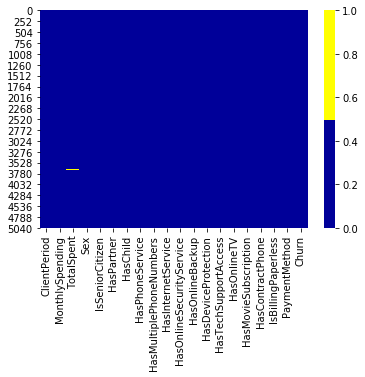

In [9]:
# Тепловая карта пропущенных значений

cols = data.columns
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [10]:
data['TotalSpent'] = data['TotalSpent'].astype(float)

**Поменяли тип данных с object на float в  столбце TotalSpent.**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
ClientPeriod                5282 non-null int64
MonthlySpending             5282 non-null float64
TotalSpent                  5273 non-null float64
Sex                         5282 non-null object
IsSeniorCitizen             5282 non-null int64
HasPartner                  5282 non-null object
HasChild                    5282 non-null object
HasPhoneService             5282 non-null object
HasMultiplePhoneNumbers     5282 non-null object
HasInternetService          5282 non-null object
HasOnlineSecurityService    5282 non-null object
HasOnlineBackup             5282 non-null object
HasDeviceProtection         5282 non-null object
HasTechSupportAccess        5282 non-null object
HasOnlineTV                 5282 non-null object
HasMovieSubscription        5282 non-null object
HasContractPhone            5282 non-null object
IsBillingPaperless          5282 non-null object
PaymentMeth

In [12]:
data = data.dropna()

**Удаляем пустышки, потому что в столбце TotalSpent значение пробела имели, видимо, новые пользователи, чей период пользования составлял менее 1 месяца, и в столбце оттока у этих пользователей везде стоит 0. Я сделала вывод, что они не очень информативны, потому что у них еще не прошел базовый период пользования, после которого пользователь принимает решение уйти или остаться, поэтому везде в столбце оттока стоят 0.** 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
ClientPeriod                5273 non-null int64
MonthlySpending             5273 non-null float64
TotalSpent                  5273 non-null float64
Sex                         5273 non-null object
IsSeniorCitizen             5273 non-null int64
HasPartner                  5273 non-null object
HasChild                    5273 non-null object
HasPhoneService             5273 non-null object
HasMultiplePhoneNumbers     5273 non-null object
HasInternetService          5273 non-null object
HasOnlineSecurityService    5273 non-null object
HasOnlineBackup             5273 non-null object
HasDeviceProtection         5273 non-null object
HasTechSupportAccess        5273 non-null object
HasOnlineTV                 5273 non-null object
HasMovieSubscription        5273 non-null object
HasContractPhone            5273 non-null object
IsBillingPaperless          5273 non-null object
PaymentMeth

In [14]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [15]:
# Числовые признаки
num = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
   
]

# Категориальные признаки
cat = [

    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature = num + cat
target = 'Churn'

## Анализ данных

**Проанализируем данные. Для численных призанков построим гистограмму и boxplot. Для категориальных посчитаем количество каждого значения для каждого признака.**

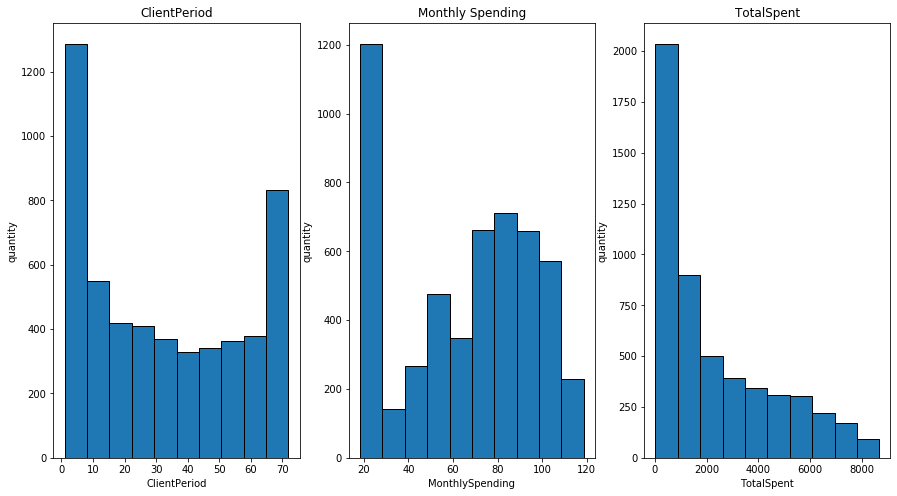

In [16]:
fig1 = plt.figure( figsize =(15, 8))
plt.subplot(1, 3, 1)
plt.title('ClientPeriod')
plt.xlabel('ClientPeriod')
plt.ylabel('quantity')
plt.hist(data['ClientPeriod'], edgecolor = 'black')
plt.subplot(1, 3, 2)
plt.title('Monthly Spending')
plt.xlabel('MonthlySpending')
plt.ylabel('quantity')
plt.hist(data['MonthlySpending'], edgecolor = 'black')
plt.subplot(1, 3, 3)
plt.title('TotalSpent')
plt.xlabel('TotalSpent')
plt.ylabel('quantity')
plt.hist(data['TotalSpent'],  edgecolor = 'black')
plt.show()

**Нет каких-либо выбросов или аномалий.**

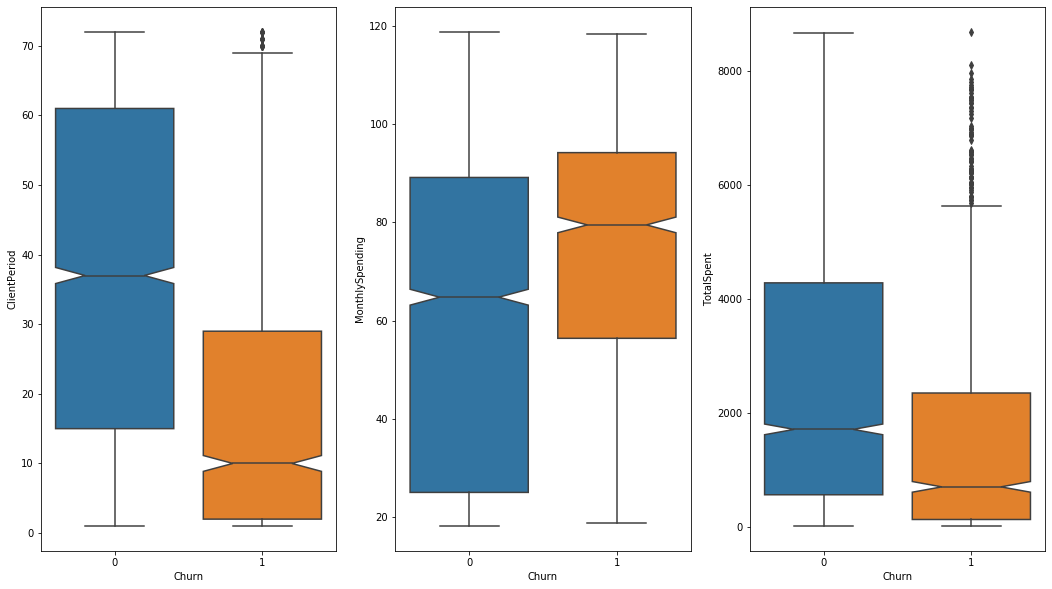

In [17]:
fig2, axes2 = plt.subplots(nrows=1, ncols=3, figsize=(18, 10))
for idx, feat in enumerate(num):
    sns.boxplot(x='Churn', y=feat, data=data, ax=axes2[idx], notch=True)
    axes2[idx].set_xlabel('Churn')
    axes2[idx].set_ylabel(feat)

**По графикам можно сделать выводы, что новые пользователи в среднем имеют большую вероятность оттока. Те, кто уходит в среднем ежемесячно тратит больше. Ну а то, что у оставшихся общие расходы больше, чем у тех, кто ушел, вполне логично.**

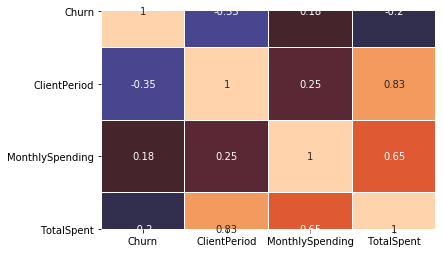

In [18]:
corr_matrix = data.loc[:, ['Churn']+num].corr()
sns.heatmap(corr_matrix, center= 0, linewidths=0.1, annot=True, cbar_kws= {'orientation': 'horizontal'}, cbar=False)

**Линейная зависимость у показателей ClientPeriod и TotalSpent достаточно ожидаемо.**

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


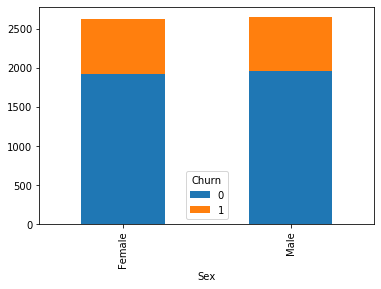

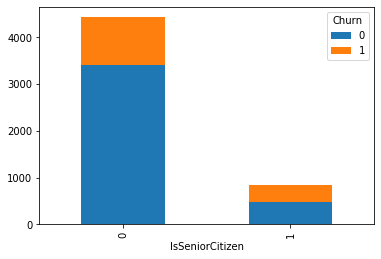

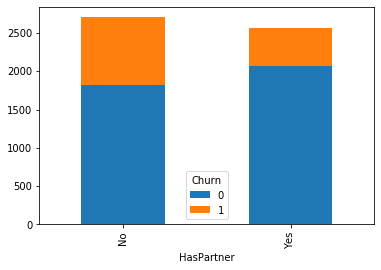

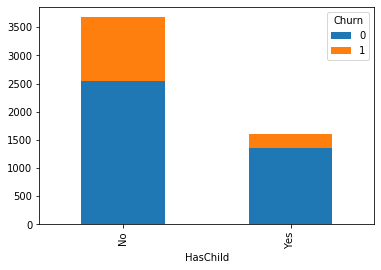

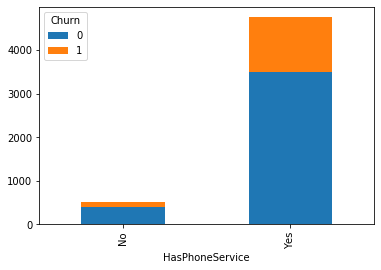

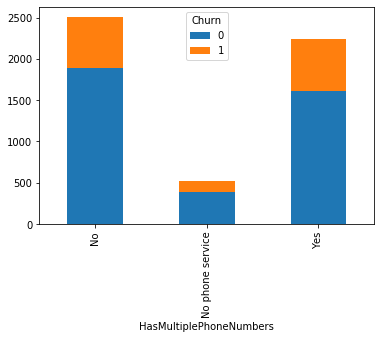

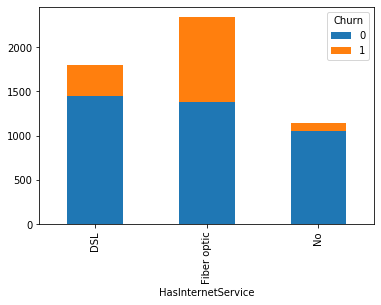

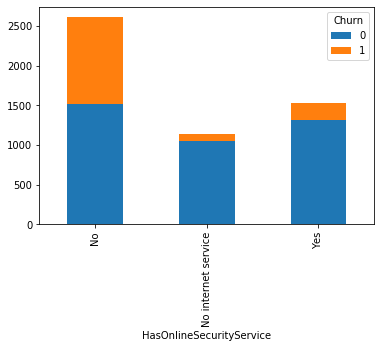

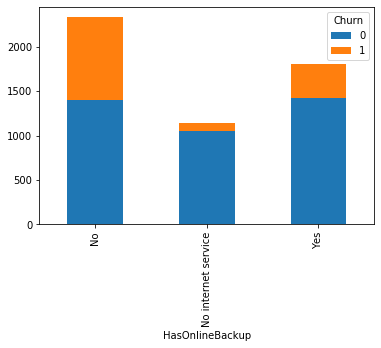

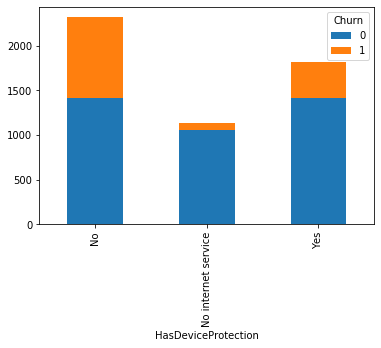

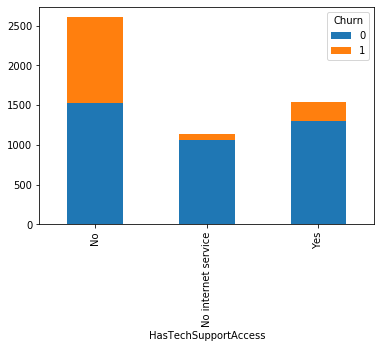

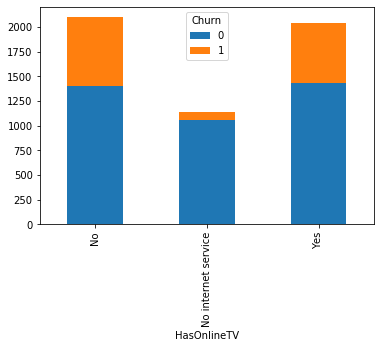

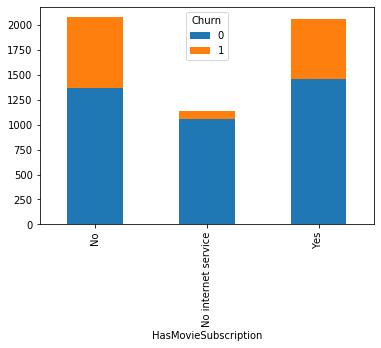

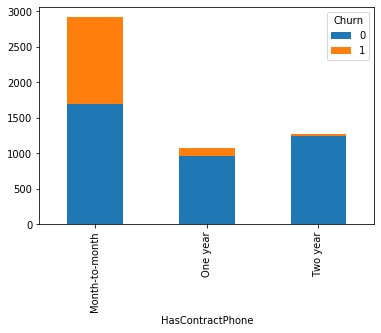

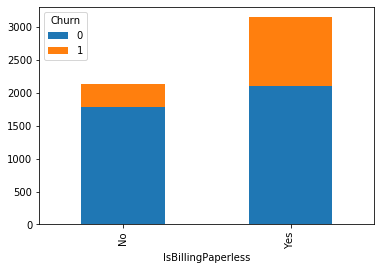

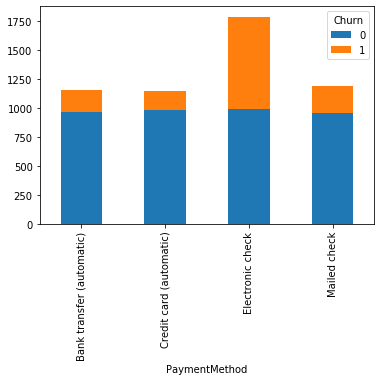

In [19]:
for i in range(len(cat)):
    print(pd.DataFrame(data.groupby(['Churn',cat[i]])\
       .size()\
       .unstack(0)).plot.bar(stacked=True))

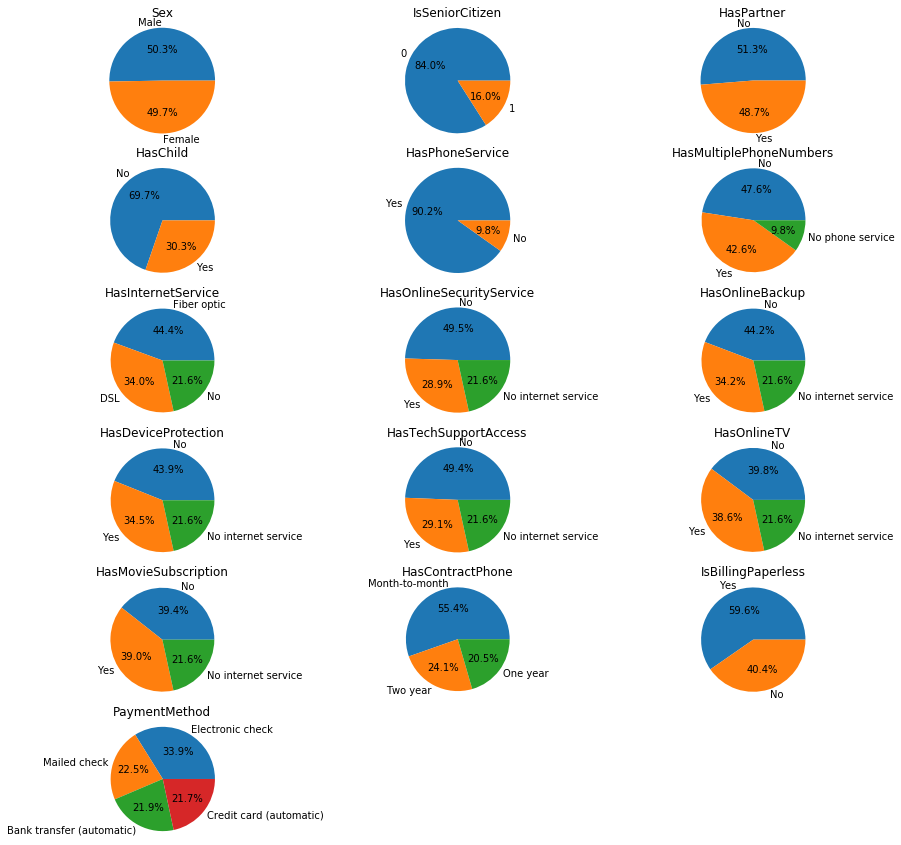

In [20]:
fig = plt.figure(figsize =(15, 15))
for i in range(len(cat)):
  pie_i=data[cat[i]].value_counts()
  plt.subplot(6,3,i+1)
  plt.pie(pie_i, labels = pie_i.index, autopct='%1.1f%%')
  plt.axis('equal')
  plt.title(cat[i])

**Посмотрели, как распределены категориальные признаки. Заметим, что классы не сбалансированы, распределение по классам соответсвует отношению 3:1.**

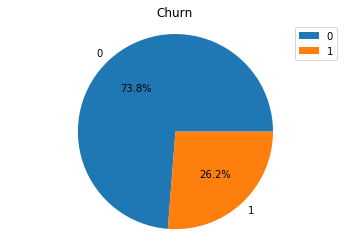

In [21]:
plt.pie(data['Churn'].value_counts(), labels = data['Churn'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Churn')
plt.legend()
plt.show()

## Применение линейных моделей

**Обработаем данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируем числовые признаки, а категориальные закодируем с помощью one-hot-encoding'а. С помощью кроссвалидации или разделения на train/valid выборки протестируем разные значения гиперпараметра C и выберем лучший по метрике ROC-AUC.**

In [22]:
dummy_features = pd.get_dummies(data[cat])
X = pd.concat([data[num], dummy_features], axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

cls = make_pipeline(StandardScaler(),LogisticRegression())
param_grid = {'logisticregression__C': np.array([100, 10, 1, 0.1, 0.01, 0.001])}
GCVsearch = GridSearchCV(cls, param_grid, n_jobs=-1, cv=4, refit=True, scoring='roc_auc')
GCVsearch.fit(X_train, y_train)
print(GCVsearch.best_params_)
print(GCVsearch.best_score_)
print(GCVsearch.best_estimator_)

{'logisticregression__C': 100.0}
0.8456556150988753
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=100.0))])


**Лучшее качество у LogisticRegression 0.8456556150988753 при параметре C=100.0.**

In [23]:
X_basis = pd.concat([data[num], data[cat]], axis=1)

In [24]:
cat_idx = [data.columns.get_loc(c) for c in cat if c in data]

In [25]:
X_train_basis, X_test_basis, y_train_basis, y_test_basis= train_test_split(X_basis.values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=42)
catboost_model =catboost.CatBoostClassifier(cat_features=cat_idx, 
                                            random_seed=42, verbose=False)
params={'learning_rate': np.arange(0.01, 0.2, 0.01),
      'depth': [2, 3, 4],
      'l2_leaf_reg': [2, 3, 4, 5],
      'iterations' : [80, 100, 150, 200, 250]} #Сетка параметров 
grid_search_result = catboost_model.grid_search(params, 
                           X_train_basis, y_train_basis, 
                           plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.5086877047
bestIteration = 79

0:	loss: 0.5086877	best: 0.5086877 (0)	total: 1.13s	remaining: 21m 30s

bestTest = 0.4535531634
bestIteration = 79

1:	loss: 0.4535532	best: 0.4535532 (1)	total: 2.02s	remaining: 19m 9s

bestTest = 0.4326052751
bestIteration = 79

2:	loss: 0.4326053	best: 0.4326053 (2)	total: 3.08s	remaining: 19m 29s

bestTest = 0.4219420364
bestIteration = 79

3:	loss: 0.4219420	best: 0.4219420 (3)	total: 3.87s	remaining: 18m 18s

bestTest = 0.418690113
bestIteration = 79

4:	loss: 0.4186901	best: 0.4186901 (4)	total: 4.7s	remaining: 17m 47s

bestTest = 0.4128981618
bestIteration = 79

5:	loss: 0.4128982	best: 0.4128982 (5)	total: 5.49s	remaining: 17m 17s

bestTest = 0.4124118144
bestIteration = 79

6:	loss: 0.4124118	best: 0.4124118 (6)	total: 6.32s	remaining: 17m 2s

bestTest = 0.4105894477
bestIteration = 79

7:	loss: 0.4105894	best: 0.4105894 (7)	total: 7.28s	remaining: 17m 9s

bestTest = 0.40891736
bestIteration = 79

8:	loss: 0.4089174	best: 0.4089174


bestTest = 0.4086167606
bestIteration = 79

71:	loss: 0.4086168	best: 0.4047609 (14)	total: 1m	remaining: 14m 57s

bestTest = 0.4083732055
bestIteration = 75

72:	loss: 0.4083732	best: 0.4047609 (14)	total: 1m 1s	remaining: 14m 56s

bestTest = 0.4064915684
bestIteration = 79

73:	loss: 0.4064916	best: 0.4047609 (14)	total: 1m 2s	remaining: 14m 55s

bestTest = 0.4060129943
bestIteration = 75

74:	loss: 0.4060130	best: 0.4047609 (14)	total: 1m 3s	remaining: 14m 55s

bestTest = 0.4060706289
bestIteration = 58

75:	loss: 0.4060706	best: 0.4047609 (14)	total: 1m 3s	remaining: 14m 53s

bestTest = 0.4880606354
bestIteration = 99

76:	loss: 0.4880606	best: 0.4047609 (14)	total: 1m 4s	remaining: 14m 56s

bestTest = 0.442107536
bestIteration = 99

77:	loss: 0.4421075	best: 0.4047609 (14)	total: 1m 5s	remaining: 14m 57s

bestTest = 0.4250790121
bestIteration = 99

78:	loss: 0.4250790	best: 0.4047609 (14)	total: 1m 6s	remaining: 14m 59s

bestTest = 0.4171167432
bestIteration = 99

79:	loss: 0.417


bestTest = 0.4095527659
bestIteration = 96

140:	loss: 0.4095528	best: 0.4047609 (14)	total: 2m 12s	remaining: 15m 40s

bestTest = 0.4083770223
bestIteration = 99

141:	loss: 0.4083770	best: 0.4047609 (14)	total: 2m 13s	remaining: 15m 39s

bestTest = 0.4093763164
bestIteration = 95

142:	loss: 0.4093763	best: 0.4047609 (14)	total: 2m 14s	remaining: 15m 39s

bestTest = 0.406620666
bestIteration = 93

143:	loss: 0.4066207	best: 0.4047609 (14)	total: 2m 15s	remaining: 15m 37s

bestTest = 0.408345115
bestIteration = 86

144:	loss: 0.4083451	best: 0.4047609 (14)	total: 2m 16s	remaining: 15m 35s

bestTest = 0.4083507546
bestIteration = 99

145:	loss: 0.4083508	best: 0.4047609 (14)	total: 2m 17s	remaining: 15m 33s

bestTest = 0.4059511981
bestIteration = 95

146:	loss: 0.4059512	best: 0.4047609 (14)	total: 2m 17s	remaining: 15m 31s

bestTest = 0.4081524829
bestIteration = 99

147:	loss: 0.4081525	best: 0.4047609 (14)	total: 2m 18s	remaining: 15m 29s

bestTest = 0.4082574031
bestIteration = 8


bestTest = 0.4055714042
bestIteration = 83

208:	loss: 0.4055714	best: 0.4044034 (184)	total: 3m 31s	remaining: 15m 42s

bestTest = 0.4549217427
bestIteration = 149

209:	loss: 0.4549217	best: 0.4044034 (184)	total: 3m 32s	remaining: 15m 41s

bestTest = 0.4240166507
bestIteration = 149

210:	loss: 0.4240167	best: 0.4044034 (184)	total: 3m 34s	remaining: 15m 42s

bestTest = 0.4159010692
bestIteration = 149

211:	loss: 0.4159011	best: 0.4044034 (184)	total: 3m 35s	remaining: 15m 43s

bestTest = 0.4120561566
bestIteration = 149

212:	loss: 0.4120562	best: 0.4044034 (184)	total: 3m 36s	remaining: 15m 43s

bestTest = 0.4077715102
bestIteration = 149

213:	loss: 0.4077715	best: 0.4044034 (184)	total: 3m 38s	remaining: 15m 45s

bestTest = 0.4073888535
bestIteration = 149

214:	loss: 0.4073889	best: 0.4044034 (184)	total: 3m 39s	remaining: 15m 45s

bestTest = 0.4074201408
bestIteration = 146

215:	loss: 0.4074201	best: 0.4044034 (184)	total: 3m 41s	remaining: 15m 45s

bestTest = 0.4077454315



bestTest = 0.4070229899
bestIteration = 198

276:	loss: 0.4070230	best: 0.4034618 (238)	total: 5m 28s	remaining: 17m 4s

bestTest = 0.4045818597
bestIteration = 199

277:	loss: 0.4045819	best: 0.4034618 (238)	total: 5m 30s	remaining: 17m 5s

bestTest = 0.4046409544
bestIteration = 96

278:	loss: 0.4046410	best: 0.4034618 (238)	total: 5m 32s	remaining: 17m 5s

bestTest = 0.4063041921
bestIteration = 186

279:	loss: 0.4063042	best: 0.4034618 (238)	total: 5m 34s	remaining: 17m 6s

bestTest = 0.4051991145
bestIteration = 199

280:	loss: 0.4051991	best: 0.4034618 (238)	total: 5m 36s	remaining: 17m 7s

bestTest = 0.4046599776
bestIteration = 196

281:	loss: 0.4046600	best: 0.4034618 (238)	total: 5m 38s	remaining: 17m 8s

bestTest = 0.4044687793
bestIteration = 132

282:	loss: 0.4044688	best: 0.4034618 (238)	total: 5m 40s	remaining: 17m 10s

bestTest = 0.4058226322
bestIteration = 180

283:	loss: 0.4058226	best: 0.4034618 (238)	total: 5m 42s	remaining: 17m 11s

bestTest = 0.4055399983
bestIt


bestTest = 0.4089943723
bestIteration = 249

344:	loss: 0.4089944	best: 0.4034618 (238)	total: 7m 56s	remaining: 18m 18s

bestTest = 0.406837966
bestIteration = 249

345:	loss: 0.4068380	best: 0.4034618 (238)	total: 7m 59s	remaining: 18m 20s

bestTest = 0.4062919216
bestIteration = 242

346:	loss: 0.4062919	best: 0.4034618 (238)	total: 8m 2s	remaining: 18m 23s

bestTest = 0.4058375473
bestIteration = 246

347:	loss: 0.4058375	best: 0.4034618 (238)	total: 8m 6s	remaining: 18m 28s

bestTest = 0.4063515546
bestIteration = 249

348:	loss: 0.4063516	best: 0.4034618 (238)	total: 8m 9s	remaining: 18m 30s

bestTest = 0.4038134068
bestIteration = 211

349:	loss: 0.4038134	best: 0.4034618 (238)	total: 8m 12s	remaining: 18m 32s

bestTest = 0.4046436258
bestIteration = 185

350:	loss: 0.4046436	best: 0.4034618 (238)	total: 8m 15s	remaining: 18m 34s

bestTest = 0.4064454242
bestIteration = 158

351:	loss: 0.4064454	best: 0.4034618 (238)	total: 8m 18s	remaining: 18m 37s

bestTest = 0.4070137657
bes


bestTest = 0.4075000882
bestIteration = 79

412:	loss: 0.4075001	best: 0.4034618 (238)	total: 10m 7s	remaining: 17m 49s

bestTest = 0.4088567176
bestIteration = 79

413:	loss: 0.4088567	best: 0.4034618 (238)	total: 10m 8s	remaining: 17m 47s

bestTest = 0.4082288151
bestIteration = 78

414:	loss: 0.4082288	best: 0.4034618 (238)	total: 10m 9s	remaining: 17m 45s

bestTest = 0.4082224112
bestIteration = 68

415:	loss: 0.4082224	best: 0.4034618 (238)	total: 10m 10s	remaining: 17m 42s

bestTest = 0.407219321
bestIteration = 62

416:	loss: 0.4072193	best: 0.4034618 (238)	total: 10m 11s	remaining: 17m 40s

bestTest = 0.4083942663
bestIteration = 59

417:	loss: 0.4083943	best: 0.4034618 (238)	total: 10m 12s	remaining: 17m 37s

bestTest = 0.4975592603
bestIteration = 79

418:	loss: 0.4975593	best: 0.4034618 (238)	total: 10m 13s	remaining: 17m 35s

bestTest = 0.4465273212
bestIteration = 79

419:	loss: 0.4465273	best: 0.4034618 (238)	total: 10m 14s	remaining: 17m 32s

bestTest = 0.4271271116
bes


bestTest = 0.4103493351
bestIteration = 99

480:	loss: 0.4103493	best: 0.4034618 (238)	total: 11m 28s	remaining: 15m 43s

bestTest = 0.4097087579
bestIteration = 99

481:	loss: 0.4097088	best: 0.4034618 (238)	total: 11m 29s	remaining: 15m 41s

bestTest = 0.4086310981
bestIteration = 99

482:	loss: 0.4086311	best: 0.4034618 (238)	total: 11m 31s	remaining: 15m 40s

bestTest = 0.4077512511
bestIteration = 96

483:	loss: 0.4077513	best: 0.4034618 (238)	total: 11m 32s	remaining: 15m 39s

bestTest = 0.4095533309
bestIteration = 94

484:	loss: 0.4095533	best: 0.4034618 (238)	total: 11m 34s	remaining: 15m 37s

bestTest = 0.4061086289
bestIteration = 86

485:	loss: 0.4061086	best: 0.4034618 (238)	total: 11m 35s	remaining: 15m 36s

bestTest = 0.4059590301
bestIteration = 95

486:	loss: 0.4059590	best: 0.4034618 (238)	total: 11m 37s	remaining: 15m 34s

bestTest = 0.4075901219
bestIteration = 92

487:	loss: 0.4075901	best: 0.4034618 (238)	total: 11m 38s	remaining: 15m 33s

bestTest = 0.4069811134


bestTest = 0.4049842087
bestIteration = 92

548:	loss: 0.4049842	best: 0.4034618 (238)	total: 13m 17s	remaining: 14m 18s

bestTest = 0.4073224855
bestIteration = 78

549:	loss: 0.4073225	best: 0.4034618 (238)	total: 13m 19s	remaining: 14m 17s

bestTest = 0.4063602543
bestIteration = 81

550:	loss: 0.4063603	best: 0.4034618 (238)	total: 13m 21s	remaining: 14m 17s

bestTest = 0.4453110973
bestIteration = 149

551:	loss: 0.4453111	best: 0.4034618 (238)	total: 13m 23s	remaining: 14m 16s

bestTest = 0.4192892985
bestIteration = 149

552:	loss: 0.4192893	best: 0.4034618 (238)	total: 13m 25s	remaining: 14m 15s

bestTest = 0.4110279877
bestIteration = 149

553:	loss: 0.4110280	best: 0.4034618 (238)	total: 13m 28s	remaining: 14m 14s

bestTest = 0.410318499
bestIteration = 147

554:	loss: 0.4103185	best: 0.4034618 (238)	total: 13m 30s	remaining: 14m 14s

bestTest = 0.4089857605
bestIteration = 149

555:	loss: 0.4089858	best: 0.4034618 (238)	total: 13m 32s	remaining: 14m 13s

bestTest = 0.407643


bestTest = 0.4031367374
bestIteration = 183

616:	loss: 0.4031367	best: 0.4031367 (616)	total: 16m	remaining: 13m 33s

bestTest = 0.4052243599
bestIteration = 196

617:	loss: 0.4052244	best: 0.4031367 (616)	total: 16m 3s	remaining: 13m 34s

bestTest = 0.4044610541
bestIteration = 167

618:	loss: 0.4044611	best: 0.4031367 (616)	total: 16m 7s	remaining: 13m 34s

bestTest = 0.4059339262
bestIteration = 134

619:	loss: 0.4059339	best: 0.4031367 (616)	total: 16m 11s	remaining: 13m 34s

bestTest = 0.406197968
bestIteration = 107

620:	loss: 0.4061980	best: 0.4031367 (616)	total: 16m 14s	remaining: 13m 34s

bestTest = 0.4040070773
bestIteration = 97

621:	loss: 0.4040071	best: 0.4031367 (616)	total: 16m 18s	remaining: 13m 34s

bestTest = 0.4084676796
bestIteration = 54

622:	loss: 0.4084677	best: 0.4031367 (616)	total: 16m 21s	remaining: 13m 34s

bestTest = 0.4085123445
bestIteration = 60

623:	loss: 0.4085123	best: 0.4031367 (616)	total: 16m 25s	remaining: 13m 35s

bestTest = 0.4046698602
b


bestTest = 0.4052833275
bestIteration = 109

683:	loss: 0.4052833	best: 0.4026842 (658)	total: 20m 5s	remaining: 13m 23s

bestTest = 0.4223822171
bestIteration = 249

684:	loss: 0.4223822	best: 0.4026842 (658)	total: 20m 9s	remaining: 13m 23s

bestTest = 0.4106568724
bestIteration = 249

685:	loss: 0.4106569	best: 0.4026842 (658)	total: 20m 13s	remaining: 13m 23s

bestTest = 0.4078801728
bestIteration = 249

686:	loss: 0.4078802	best: 0.4026842 (658)	total: 20m 18s	remaining: 13m 23s

bestTest = 0.4069358408
bestIteration = 249

687:	loss: 0.4069358	best: 0.4026842 (658)	total: 20m 23s	remaining: 13m 23s

bestTest = 0.4076917299
bestIteration = 232

688:	loss: 0.4076917	best: 0.4026842 (658)	total: 20m 27s	remaining: 13m 23s

bestTest = 0.4057911217
bestIteration = 228

689:	loss: 0.4057911	best: 0.4026842 (658)	total: 20m 31s	remaining: 13m 23s

bestTest = 0.4079132725
bestIteration = 220

690:	loss: 0.4079133	best: 0.4026842 (658)	total: 20m 36s	remaining: 13m 23s

bestTest = 0.4053


bestTest = 0.4059500022
bestIteration = 104

751:	loss: 0.4059500	best: 0.4026842 (658)	total: 25m 20s	remaining: 13m 4s

bestTest = 0.4077862892
bestIteration = 122

752:	loss: 0.4077863	best: 0.4026842 (658)	total: 25m 24s	remaining: 13m 3s

bestTest = 0.4069419225
bestIteration = 109

753:	loss: 0.4069419	best: 0.4026842 (658)	total: 25m 29s	remaining: 13m 2s

bestTest = 0.4061683852
bestIteration = 98

754:	loss: 0.4061684	best: 0.4026842 (658)	total: 25m 33s	remaining: 13m 2s

bestTest = 0.4041907679
bestIteration = 112

755:	loss: 0.4041908	best: 0.4026842 (658)	total: 25m 38s	remaining: 13m 1s

bestTest = 0.4068550922
bestIteration = 85

756:	loss: 0.4068551	best: 0.4026842 (658)	total: 25m 42s	remaining: 13m

bestTest = 0.4062009168
bestIteration = 89

757:	loss: 0.4062009	best: 0.4026842 (658)	total: 25m 48s	remaining: 13m

bestTest = 0.4037713578
bestIteration = 91

758:	loss: 0.4037714	best: 0.4026842 (658)	total: 25m 53s	remaining: 12m 59s

bestTest = 0.4052833275
bestIter


bestTest = 0.4244396445
bestIteration = 79

819:	loss: 0.4244396	best: 0.4026842 (658)	total: 27m 36s	remaining: 10m 46s

bestTest = 0.4159566315
bestIteration = 79

820:	loss: 0.4159566	best: 0.4026842 (658)	total: 27m 37s	remaining: 10m 44s

bestTest = 0.4139770275
bestIteration = 79

821:	loss: 0.4139770	best: 0.4026842 (658)	total: 27m 39s	remaining: 10m 41s

bestTest = 0.4104434333
bestIteration = 77

822:	loss: 0.4104434	best: 0.4026842 (658)	total: 27m 41s	remaining: 10m 39s

bestTest = 0.4114752096
bestIteration = 79

823:	loss: 0.4114752	best: 0.4026842 (658)	total: 27m 43s	remaining: 10m 37s

bestTest = 0.4103227068
bestIteration = 78

824:	loss: 0.4103227	best: 0.4026842 (658)	total: 27m 45s	remaining: 10m 35s

bestTest = 0.4093611763
bestIteration = 79

825:	loss: 0.4093612	best: 0.4026842 (658)	total: 27m 46s	remaining: 10m 33s

bestTest = 0.4066599512
bestIteration = 79

826:	loss: 0.4066600	best: 0.4026842 (658)	total: 27m 48s	remaining: 10m 31s

bestTest = 0.4089452081


bestTest = 0.4047573905
bestIteration = 90

887:	loss: 0.4047574	best: 0.4026842 (658)	total: 29m 44s	remaining: 8m 26s

bestTest = 0.4119601038
bestIteration = 88

888:	loss: 0.4119601	best: 0.4026842 (658)	total: 29m 46s	remaining: 8m 24s

bestTest = 0.408314144
bestIteration = 65

889:	loss: 0.4083141	best: 0.4026842 (658)	total: 29m 48s	remaining: 8m 22s

bestTest = 0.4105796317
bestIteration = 43

890:	loss: 0.4105796	best: 0.4026842 (658)	total: 29m 50s	remaining: 8m 20s

bestTest = 0.4111237916
bestIteration = 87

891:	loss: 0.4111238	best: 0.4026842 (658)	total: 29m 52s	remaining: 8m 18s

bestTest = 0.4087752484
bestIteration = 85

892:	loss: 0.4087752	best: 0.4026842 (658)	total: 29m 54s	remaining: 8m 16s

bestTest = 0.4723284598
bestIteration = 99

893:	loss: 0.4723285	best: 0.4026842 (658)	total: 29m 56s	remaining: 8m 14s

bestTest = 0.4284521146
bestIteration = 99

894:	loss: 0.4284521	best: 0.4026842 (658)	total: 29m 58s	remaining: 8m 12s

bestTest = 0.4181421919
bestIter


bestTest = 0.4066413428
bestIteration = 149

955:	loss: 0.4066413	best: 0.4026842 (658)	total: 32m 39s	remaining: 6m 17s

bestTest = 0.4080115355
bestIteration = 148

956:	loss: 0.4080115	best: 0.4026842 (658)	total: 32m 42s	remaining: 6m 15s

bestTest = 0.4083340134
bestIteration = 147

957:	loss: 0.4083340	best: 0.4026842 (658)	total: 32m 45s	remaining: 6m 13s

bestTest = 0.4098841126
bestIteration = 142

958:	loss: 0.4098841	best: 0.4026842 (658)	total: 32m 48s	remaining: 6m 11s

bestTest = 0.4035188255
bestIteration = 127

959:	loss: 0.4035188	best: 0.4026842 (658)	total: 32m 51s	remaining: 6m 9s

bestTest = 0.4080904243
bestIteration = 76

960:	loss: 0.4080904	best: 0.4026842 (658)	total: 32m 55s	remaining: 6m 7s

bestTest = 0.4055244634
bestIteration = 109

961:	loss: 0.4055245	best: 0.4026842 (658)	total: 32m 58s	remaining: 6m 6s

bestTest = 0.4076008718
bestIteration = 129

962:	loss: 0.4076009	best: 0.4026842 (658)	total: 33m 1s	remaining: 6m 4s

bestTest = 0.4047573905
bestI


bestTest = 0.4070088761
bestIteration = 49

1023:	loss: 0.4070089	best: 0.4026842 (658)	total: 38m	remaining: 4m 18s

bestTest = 0.4060889488
bestIteration = 77

1024:	loss: 0.4060889	best: 0.4026842 (658)	total: 38m 11s	remaining: 4m 17s

bestTest = 0.410534399
bestIteration = 57

1025:	loss: 0.4105344	best: 0.4026842 (658)	total: 38m 25s	remaining: 4m 16s

bestTest = 0.4245352872
bestIteration = 199

1026:	loss: 0.4245353	best: 0.4026842 (658)	total: 38m 36s	remaining: 4m 14s

bestTest = 0.4127018322
bestIteration = 199

1027:	loss: 0.4127018	best: 0.4026842 (658)	total: 38m 47s	remaining: 4m 13s

bestTest = 0.4094418962
bestIteration = 199

1028:	loss: 0.4094419	best: 0.4026842 (658)	total: 38m 57s	remaining: 4m 12s

bestTest = 0.4078920569
bestIteration = 199

1029:	loss: 0.4078921	best: 0.4026842 (658)	total: 39m 8s	remaining: 4m 10s

bestTest = 0.4071075223
bestIteration = 192

1030:	loss: 0.4071075	best: 0.4026842 (658)	total: 39m 20s	remaining: 4m 9s

bestTest = 0.4092964108
b


bestTest = 0.4047147312
bestIteration = 173

1091:	loss: 0.4047147	best: 0.4026842 (658)	total: 45m 20s	remaining: 1m 59s

bestTest = 0.4074878304
bestIteration = 155

1092:	loss: 0.4074878	best: 0.4026842 (658)	total: 45m 25s	remaining: 1m 57s

bestTest = 0.4060158754
bestIteration = 88

1093:	loss: 0.4060159	best: 0.4026842 (658)	total: 45m 30s	remaining: 1m 54s

bestTest = 0.4049812893
bestIteration = 108

1094:	loss: 0.4049813	best: 0.4026842 (658)	total: 45m 34s	remaining: 1m 52s

bestTest = 0.4059822817
bestIteration = 82

1095:	loss: 0.4059823	best: 0.4026842 (658)	total: 45m 39s	remaining: 1m 49s

bestTest = 0.4092681465
bestIteration = 61

1096:	loss: 0.4092681	best: 0.4026842 (658)	total: 45m 45s	remaining: 1m 47s

bestTest = 0.409415756
bestIteration = 51

1097:	loss: 0.4094158	best: 0.4026842 (658)	total: 45m 50s	remaining: 1m 45s

bestTest = 0.4063867251
bestIteration = 71

1098:	loss: 0.4063867	best: 0.4026842 (658)	total: 45m 54s	remaining: 1m 42s

bestTest = 0.40700887

In [26]:
grid_search_result['params']

{'depth': 3, 'l2_leaf_reg': 4, 'iterations': 200, 'learning_rate': 0.13}

**Параметры {'depth': 3, 'l2_leaf_reg': 4, 'iterations': 200, 'learning_rate': 0.13}**


In [28]:
best_model = catboost.CatBoostClassifier(iterations = 200, learning_rate = 0.13, depth = 3, l2_leaf_reg = 4, cat_features=cat_idx)
best_model.fit(X_train_basis, y_train_basis)
y_train_pred = best_model.predict_proba(X_train_basis)[:, 1]
y_test_pred = best_model.predict_proba(X_test_basis)[:, 1]

0:	learn: 0.6331314	total: 24.8ms	remaining: 4.94s
1:	learn: 0.5815325	total: 47.5ms	remaining: 4.7s
2:	learn: 0.5435195	total: 69.5ms	remaining: 4.56s
3:	learn: 0.5129956	total: 95.9ms	remaining: 4.7s
4:	learn: 0.4894161	total: 118ms	remaining: 4.6s
5:	learn: 0.4732246	total: 139ms	remaining: 4.5s
6:	learn: 0.4621417	total: 162ms	remaining: 4.47s
7:	learn: 0.4542896	total: 184ms	remaining: 4.4s
8:	learn: 0.4471201	total: 211ms	remaining: 4.48s
9:	learn: 0.4422087	total: 235ms	remaining: 4.46s
10:	learn: 0.4365094	total: 267ms	remaining: 4.58s
11:	learn: 0.4317677	total: 292ms	remaining: 4.58s
12:	learn: 0.4289614	total: 314ms	remaining: 4.52s
13:	learn: 0.4262883	total: 335ms	remaining: 4.44s
14:	learn: 0.4241357	total: 358ms	remaining: 4.42s
15:	learn: 0.4220395	total: 379ms	remaining: 4.35s
16:	learn: 0.4209206	total: 398ms	remaining: 4.28s
17:	learn: 0.4194267	total: 428ms	remaining: 4.33s
18:	learn: 0.4179154	total: 451ms	remaining: 4.3s
19:	learn: 0.4161424	total: 474ms	remaining

163:	learn: 0.3830380	total: 3.52s	remaining: 774ms
164:	learn: 0.3829551	total: 3.55s	remaining: 753ms
165:	learn: 0.3829033	total: 3.57s	remaining: 731ms
166:	learn: 0.3827066	total: 3.59s	remaining: 709ms
167:	learn: 0.3826219	total: 3.61s	remaining: 687ms
168:	learn: 0.3824332	total: 3.63s	remaining: 666ms
169:	learn: 0.3821200	total: 3.65s	remaining: 644ms
170:	learn: 0.3820412	total: 3.67s	remaining: 622ms
171:	learn: 0.3818030	total: 3.69s	remaining: 600ms
172:	learn: 0.3814297	total: 3.71s	remaining: 579ms
173:	learn: 0.3813790	total: 3.73s	remaining: 557ms
174:	learn: 0.3813367	total: 3.75s	remaining: 535ms
175:	learn: 0.3812309	total: 3.77s	remaining: 514ms
176:	learn: 0.3810542	total: 3.79s	remaining: 493ms
177:	learn: 0.3809401	total: 3.82s	remaining: 472ms
178:	learn: 0.3808034	total: 3.84s	remaining: 450ms
179:	learn: 0.3807082	total: 3.86s	remaining: 429ms
180:	learn: 0.3807042	total: 3.89s	remaining: 408ms
181:	learn: 0.3804999	total: 3.91s	remaining: 387ms
182:	learn: 

In [30]:
print("Лучшее качество: ", 'train auc = ', roc_auc_score(y_train_basis, y_train_pred), ',',
      'test auc = ', roc_auc_score(y_test_basis, y_test_pred))

Лучшее качество:  train auc =  0.8679969611227303 , test auc =  0.8433309742863883


**Лучшее качество:  train auc =  0.8679969611227303 , test auc =  0.8433309742863883**

# Предсказания

In [31]:
X_test = pd.read_csv('test.csv')

X_test = X_test.replace(' ', float('0'))

X_test['TotalSpent'] = X_test['TotalSpent'].astype(float)

In [32]:
submission = pd.read_csv('submission.csv')

submission[target] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

**Качество на кагл 0.85112**